In [2]:
import pandas as pd

import os


df = pd.read_csv(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\data\cleaned_global_country_data.csv')

df.head()

,Country,Density_P_Km2,Abbreviation,Agricultural_Land_percent,Land_AreaKm2,Armed_Forces_size,Birth_Rate,Calling_Code,Capital/Major_City,Co2_Emissions,...,Physicians_per_thousand,Population,Population:_Labor_force_participation_percent,Tax_revenue_percent,Total_tax_rate,Unemployment_rate,Urban_population,Latitude,Longitude,Continent
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,0.28,38041754.0,48.90,9.3,71.4,11.120,9797273.0,33.939110,67.709953,Asia
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,1.20,2854191.0,55.70,18.6,36.6,12.330,1747593.0,41.153332,20.168331,Europe
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,1.72,43053054.0,41.20,37.2,66.1,11.700,31510100.0,28.033886,1.659626,Africa
3,Andorra,164,AD,40.0,468.0,27500.0,7.20,376.0,Andorra la Vella,469.0,...,3.33,77142.0,58.95,20.6,38.4,5.235,67873.0,42.506285,1.521801,Europe
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,0.21,31825295.0,77.50,9.2,49.1,6.890,21061025.0,-11.202692,17.873887,Africa


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
numerical_cols = df.select_dtypes(include= ['float64','int64']).columns

In [5]:
correlation_matrix = df[numerical_cols].corr()

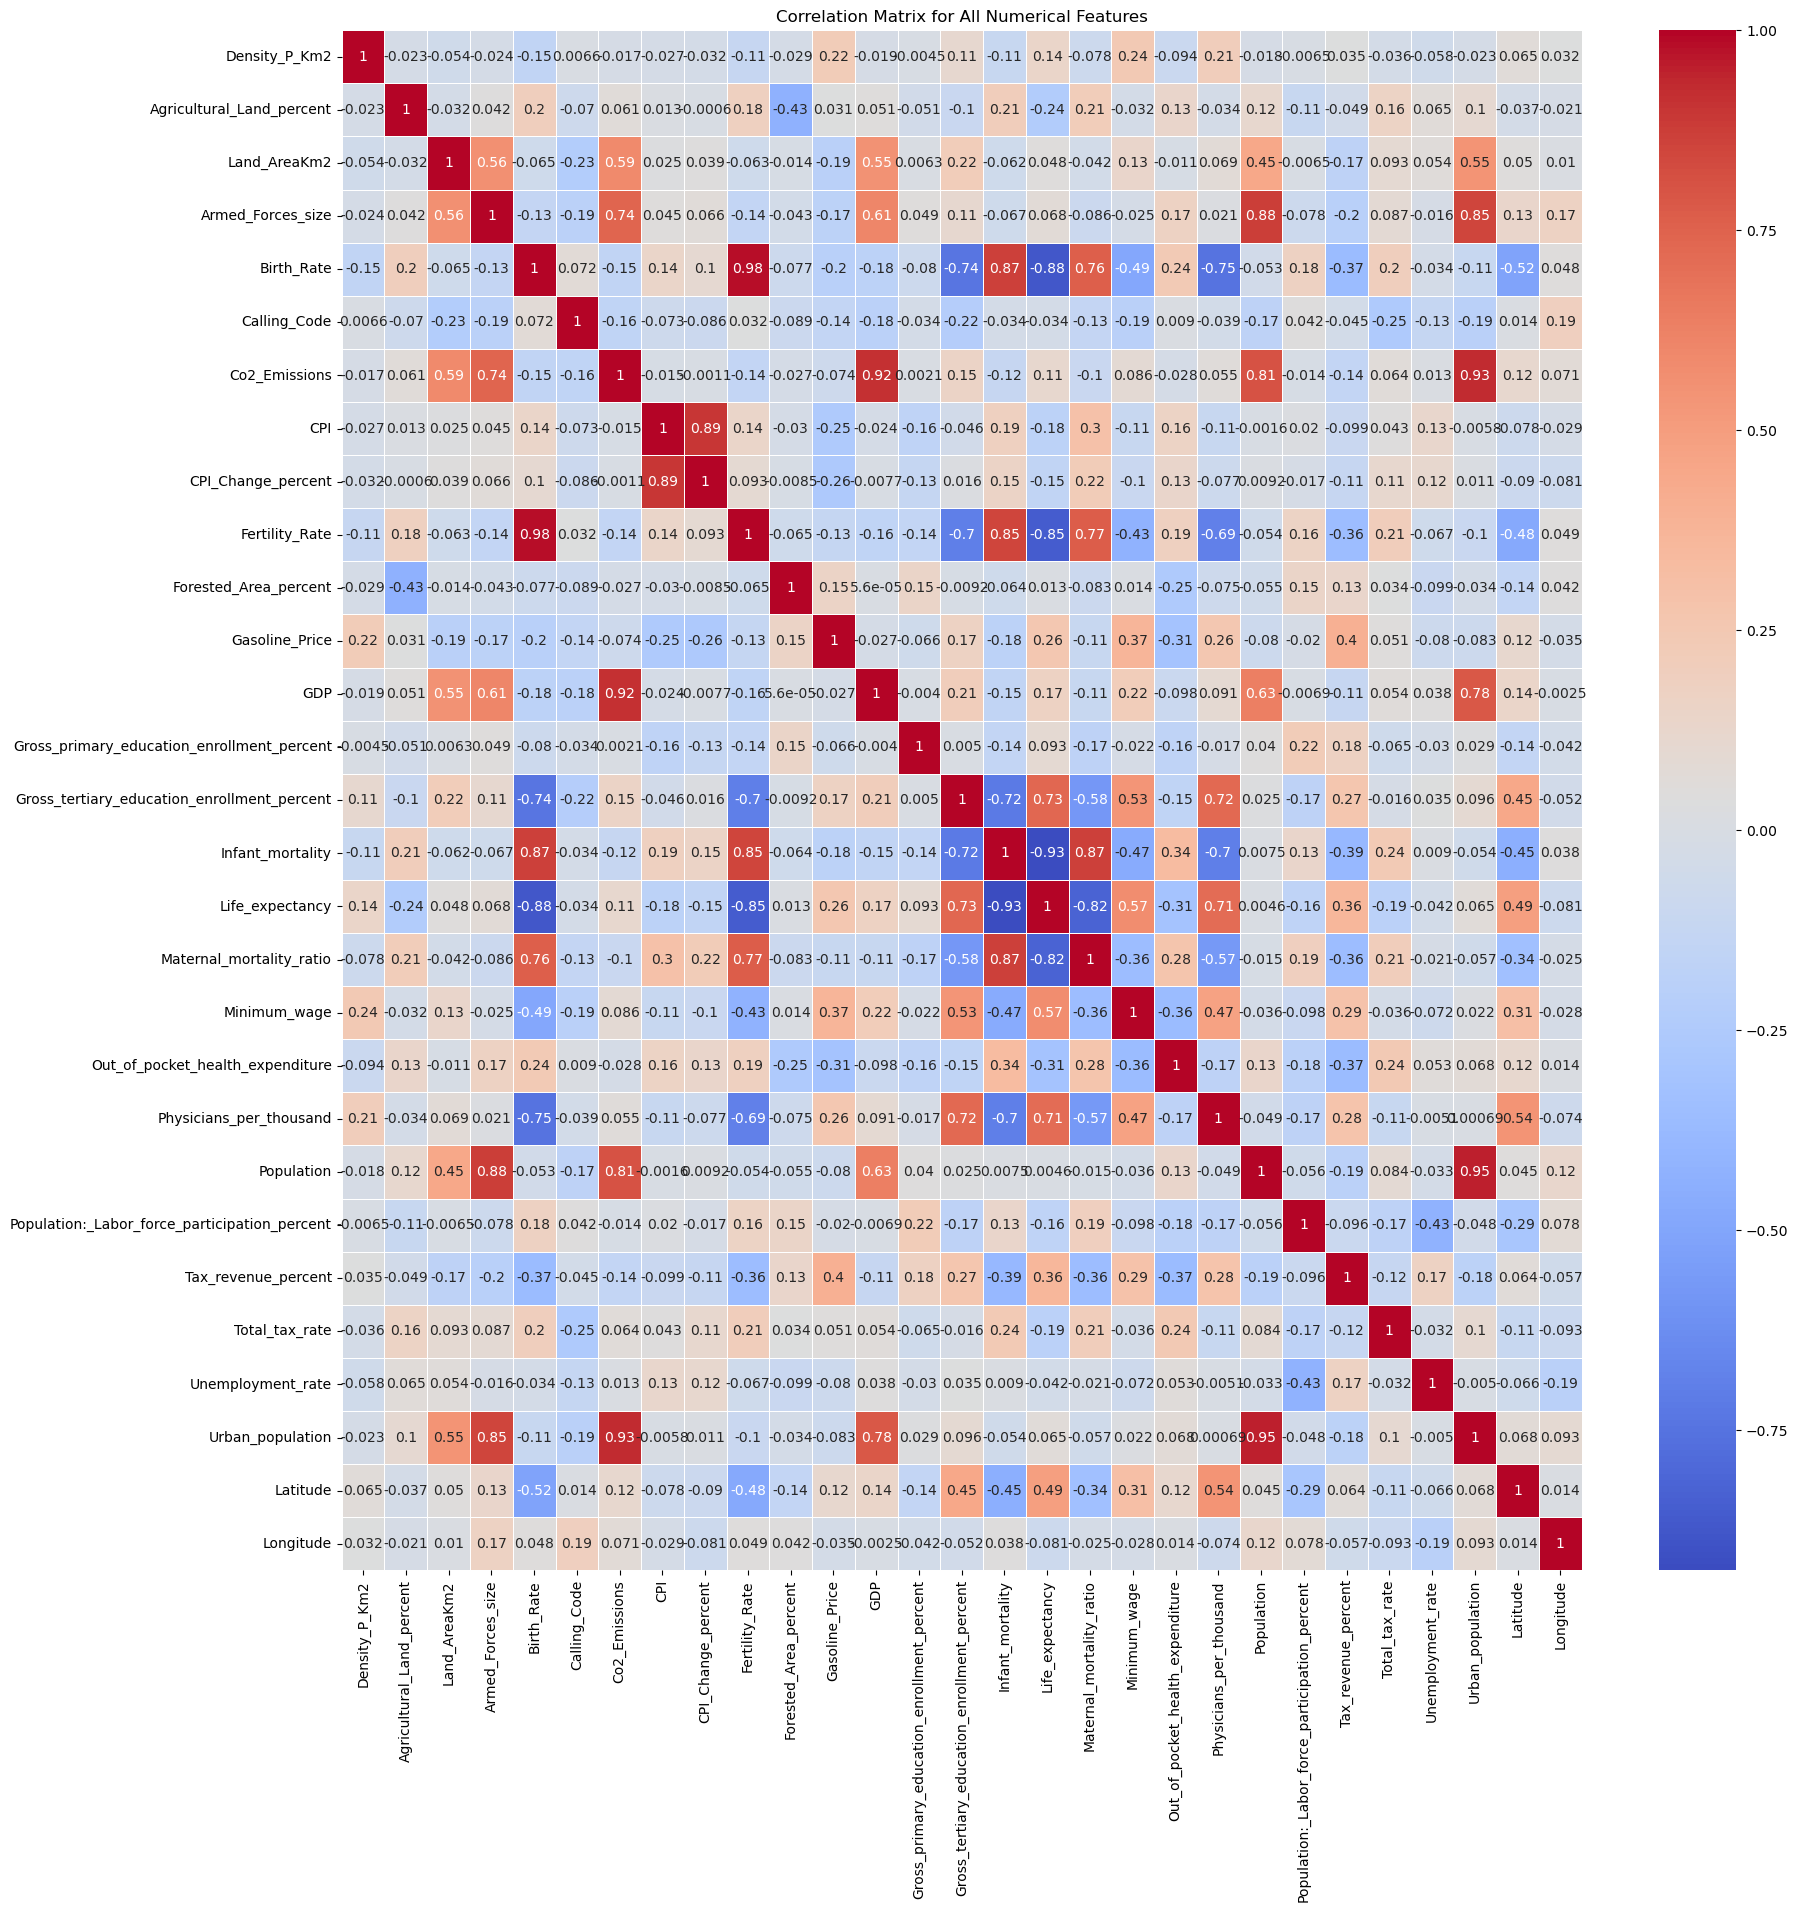

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Matrix for All Numerical Features')
plt.savefig(os.path.join(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\figurescorrelation_matrix_heatmap.png'))
plt.show()

In [7]:
correlation_pairs = correlation_matrix.unstack()

correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

sorted_correlations = correlation_pairs.sort_values(ascending=False)

correlation_df = pd.DataFrame(sorted_correlations, columns=['Correlation'])

correlation_df

Correlation
Birth_Rate       Fertility_Rate       0.980318
Fertility_Rate   Birth_Rate           0.980318
Population       Urban_population     0.954261
Urban_population Population           0.954261
Co2_Emissions    Urban_population     0.926250
...                                        ...
Life_expectancy  Fertility_Rate      -0.853140
                 Birth_Rate          -0.879196
Birth_Rate       Life_expectancy     -0.879196
Infant_mortality Life_expectancy     -0.925346
Life_expectancy  Infant_mortality    -0.925346

[812 rows x 1 columns]

In [8]:
threshold = 0.2

strong_correlations = correlation_df[correlation_df['Correlation'].abs() >= threshold]

strong_correlations = strong_correlations.reset_index()

# Sort index values alphabetically and remove duplicates by considering only unique pairs
strong_correlations['Pairs'] = strong_correlations.apply(lambda row: tuple(sorted([row['level_0'], row['level_1']])), axis=1)
strong_correlations = strong_correlations.drop_duplicates(subset='Pairs')

# Drop the auxiliary 'Pairs' column and reset the index
strong_correlations = strong_correlations.drop(columns=['Pairs']).set_index(['level_0', 'level_1'])
strong_correlations

Correlation
level_0                 level_1                              
Birth_Rate              Fertility_Rate               0.980318
Population              Urban_population             0.954261
Co2_Emissions           Urban_population             0.926250
                        GDP                          0.916940
CPI                     CPI_Change_percent           0.894890
...                                                       ...
Physicians_per_thousand Birth_Rate                  -0.747668
Life_expectancy         Maternal_mortality_ratio    -0.821086
Fertility_Rate          Life_expectancy             -0.853140
Life_expectancy         Birth_Rate                  -0.879196
Infant_mortality        Life_expectancy             -0.925346

[97 rows x 1 columns]

In [9]:
strong_correlations.to_excel(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\tables\strong_correlations.xlsx',sheet_name='Strong Correlations')

In [10]:
import pandas as pd

# Set Pandas display option to show full numbers without scientific notation
pd.set_option('display.float_format', '{:.10f}'.format)

# Get the describe statistics
describe_df = df.describe()

# Open the text file to write the formatted output
with open(r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\descriptive_stats.txt', 'w') as f:
    for column in describe_df.columns:
        f.write(f"Descriptive Statistics for {column}:\n")
        f.write(describe_df[column].to_string(header=False))
        f.write("\n\n")
        f.write("-" * 50 + "\n\n")

# Print to the console as well (if needed)
for column in describe_df.columns:
    print(f"Descriptive Statistics for {column}:")
    print(describe_df[column].to_string(header=False))
    print("\n")
    print("-" * 50 + "\n")


Descriptive Statistics for Density_P_Km2:
count     195.0000000000
mean      356.7641025641
std      1982.8889669888
min         2.0000000000
25%        35.5000000000
50%        89.0000000000
75%       216.5000000000
max     26337.0000000000


--------------------------------------------------

Descriptive Statistics for Agricultural_Land_percent:
count   195.0000000000
mean     39.1769230769
std      21.4197382421
min       0.6000000000
25%      22.6500000000
50%      40.0000000000
75%      54.8500000000
max      82.6000000000


--------------------------------------------------

Descriptive Statistics for Land_AreaKm2:
count        195.0000000000
mean      687037.4717948718
std      1916990.6219729849
min            0.0000000000
25%        24456.5000000000
50%       120538.0000000000
75%       520544.0000000000
max     17098240.0000000000


--------------------------------------------------

Descriptive Statistics for Armed_Forces_size:
count       195.0000000000
mean     142069.2307

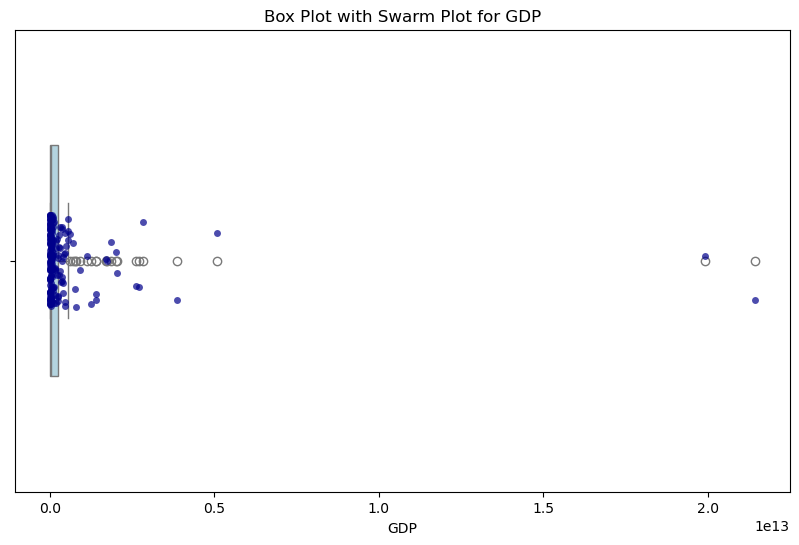

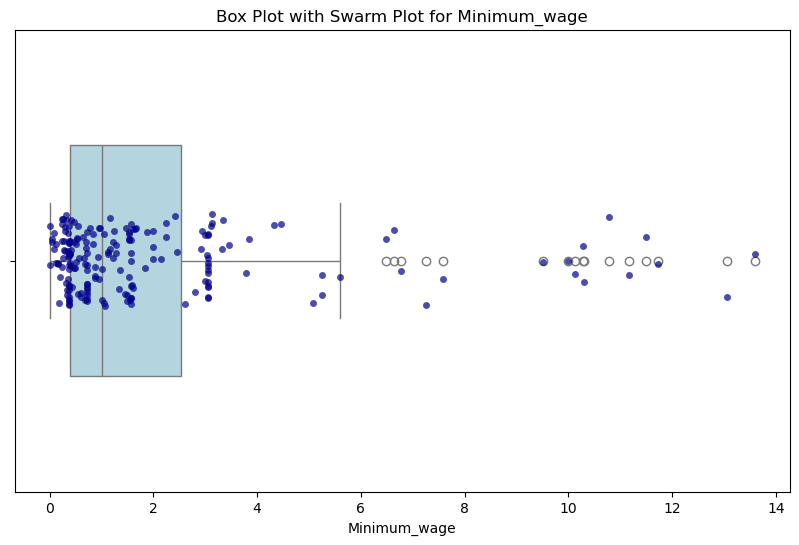

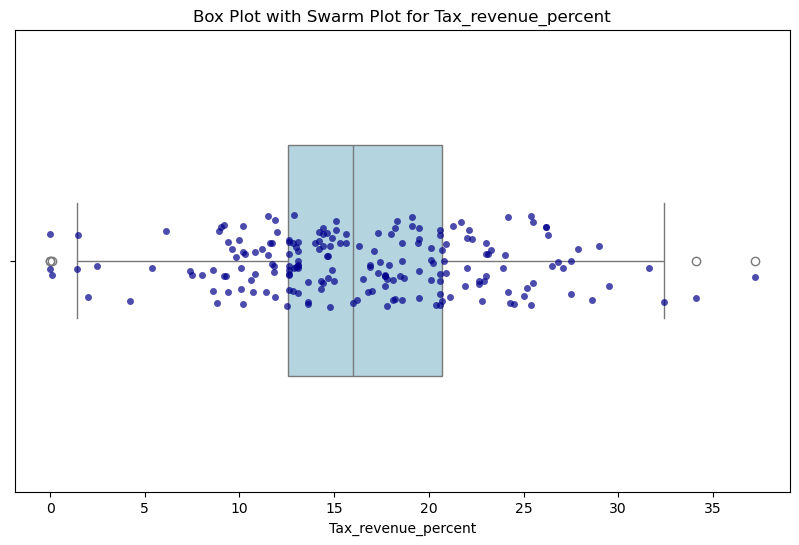

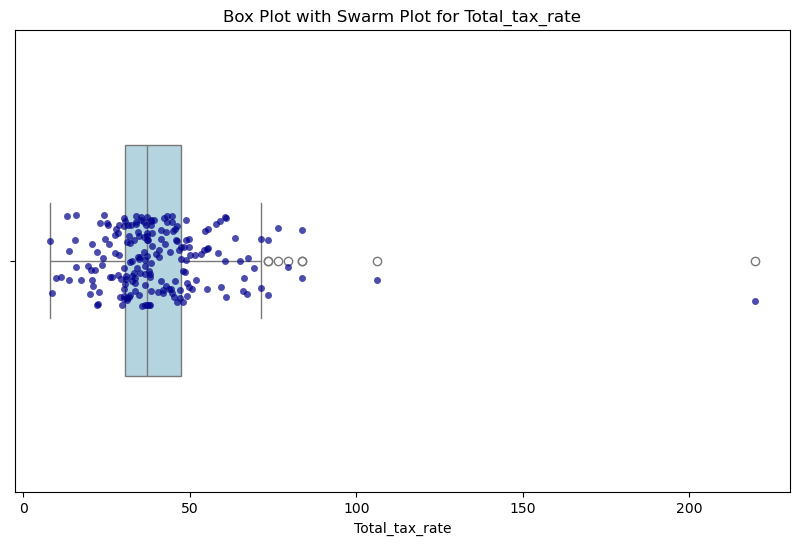

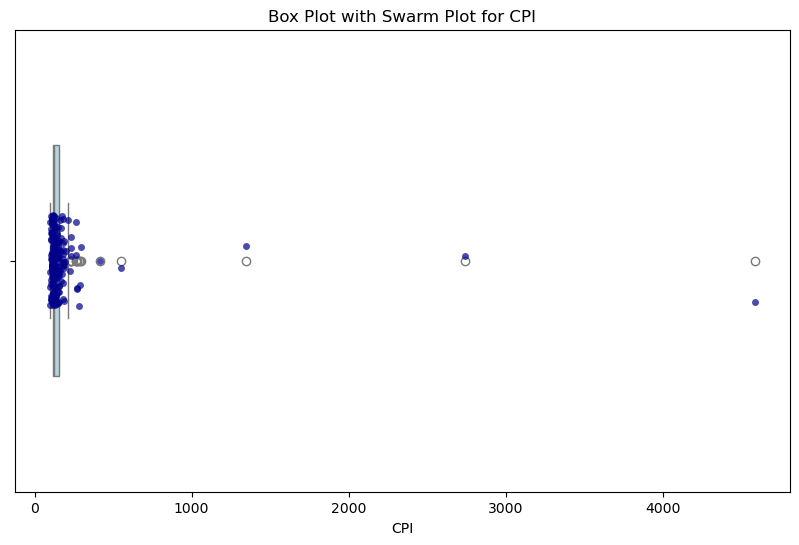

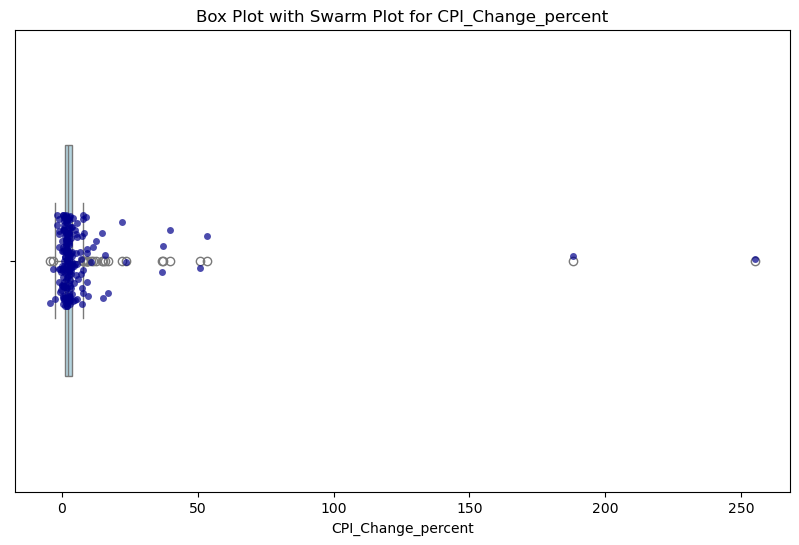

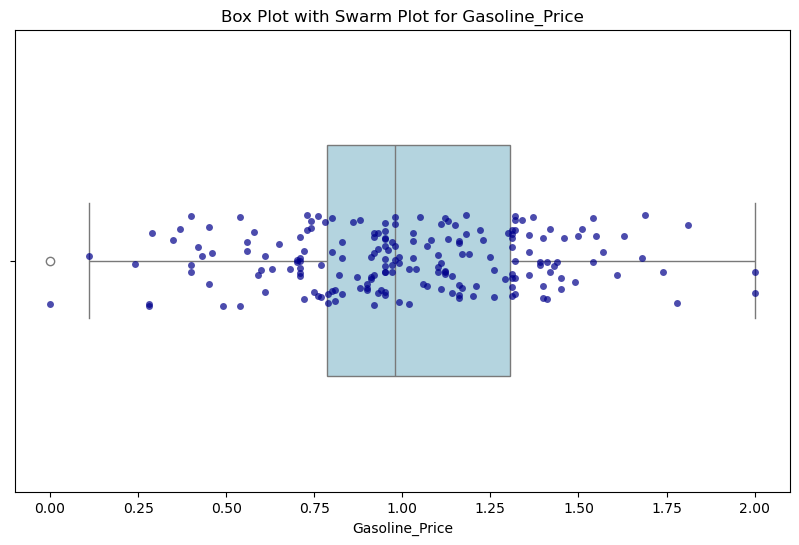

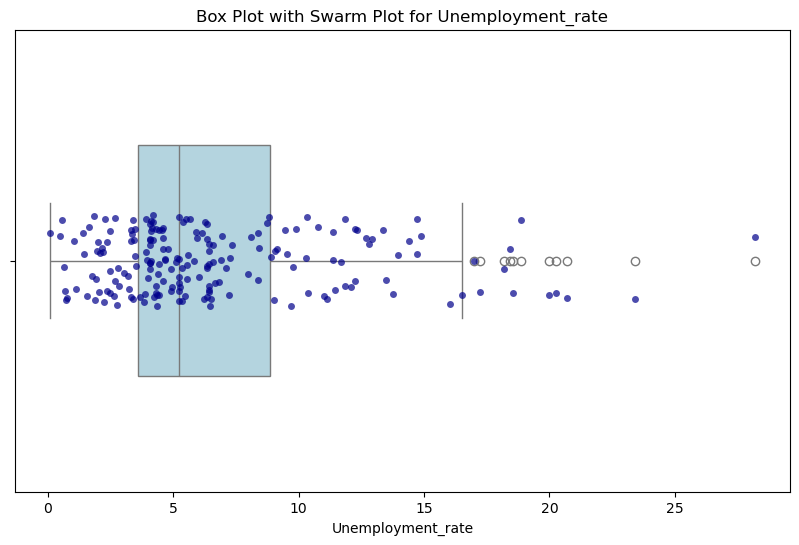

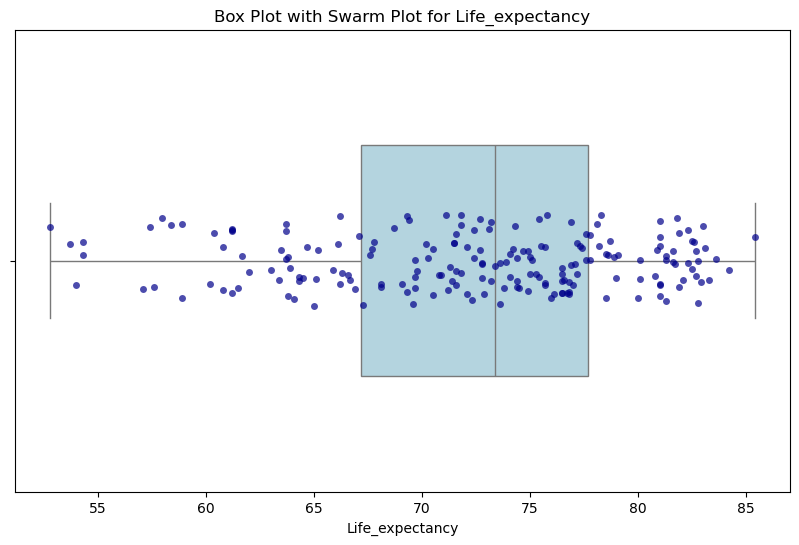

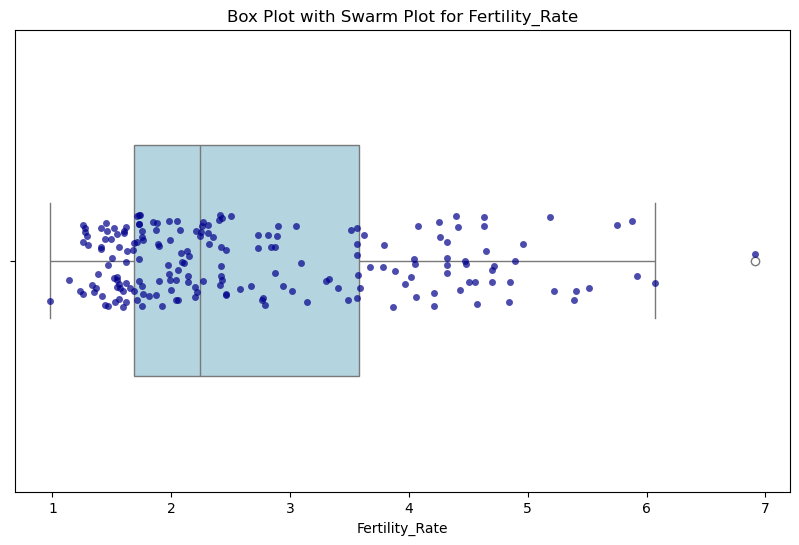

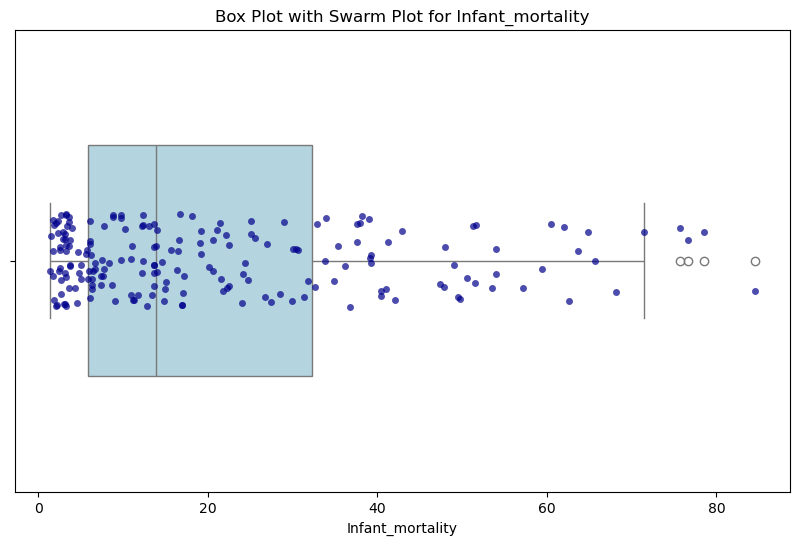

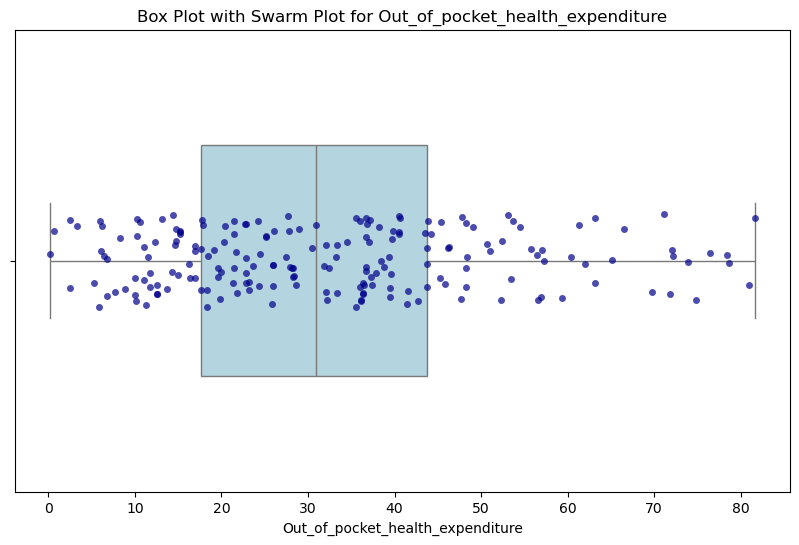

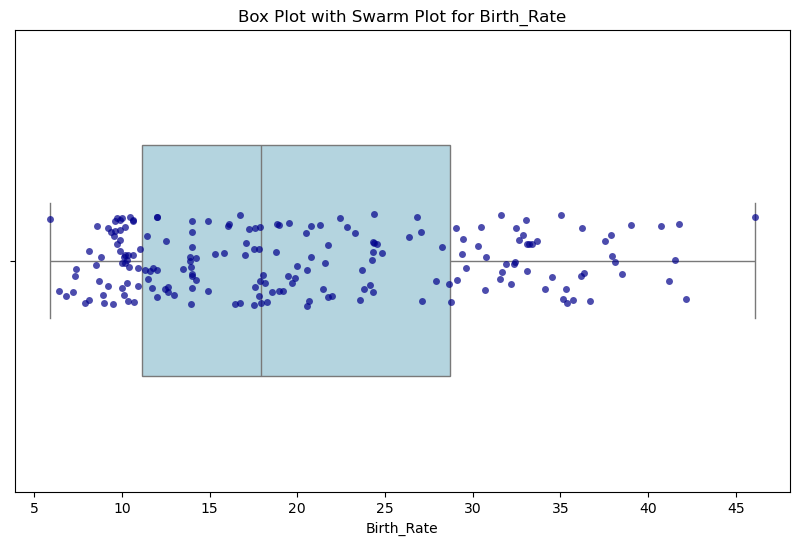

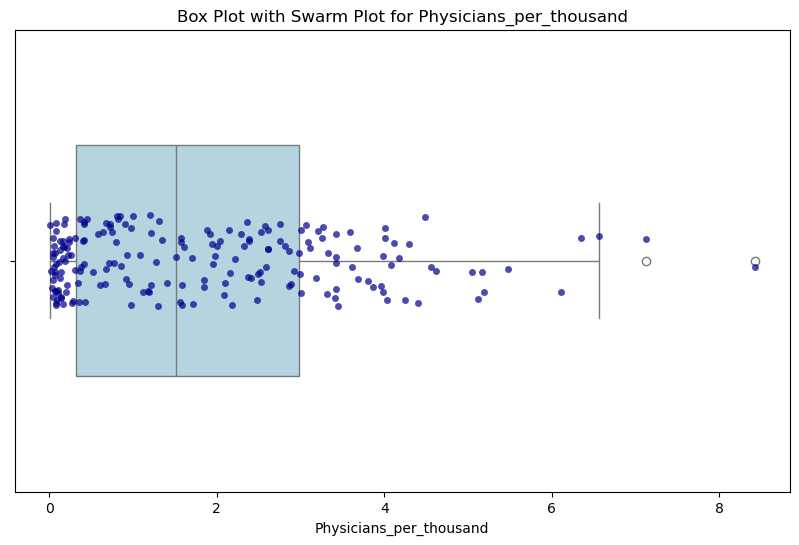

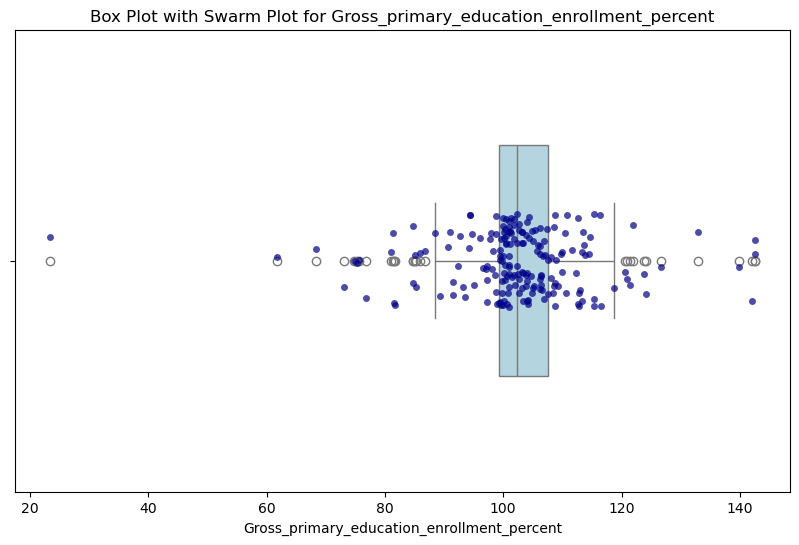

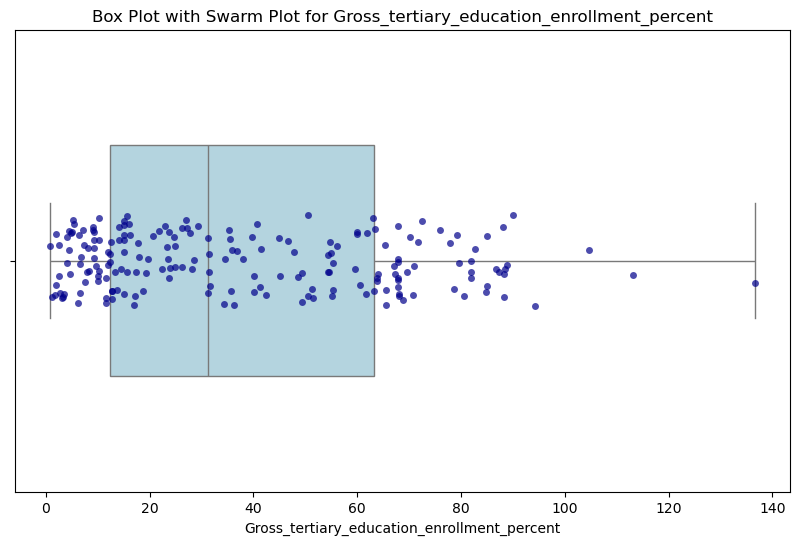

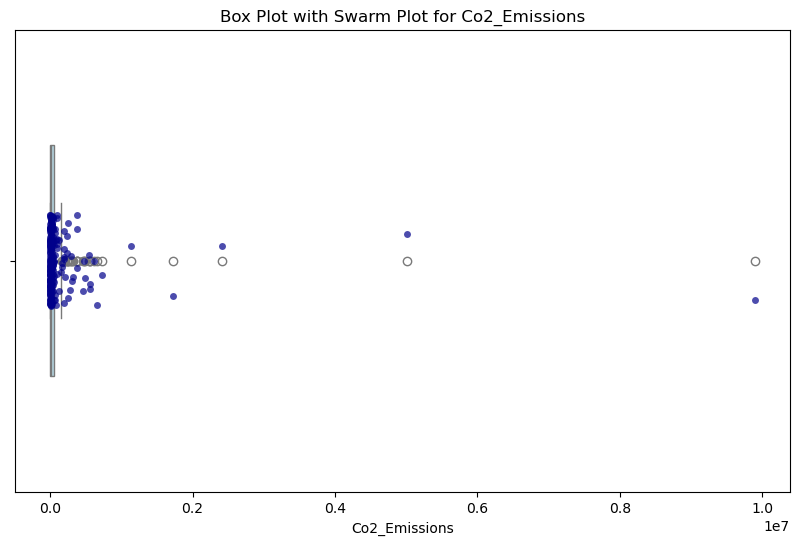

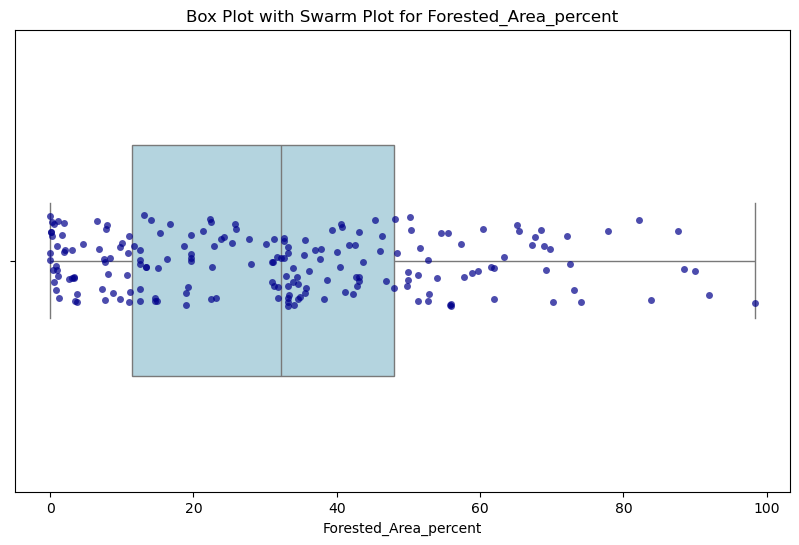

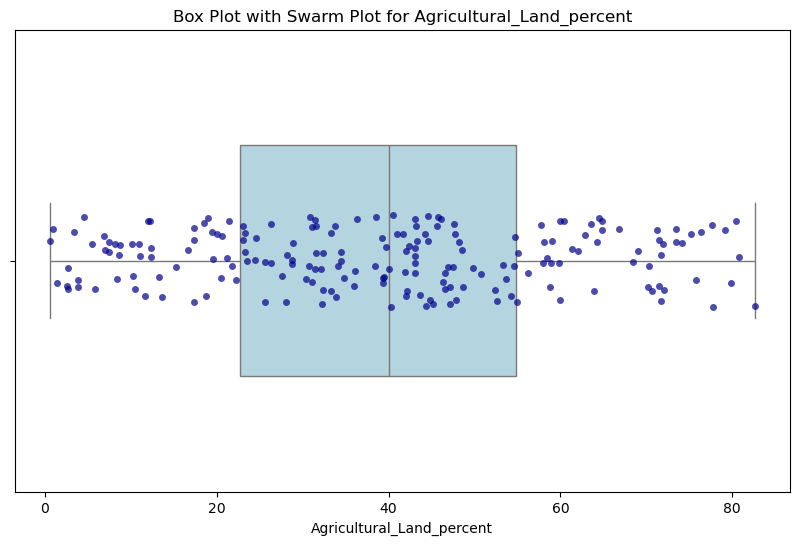

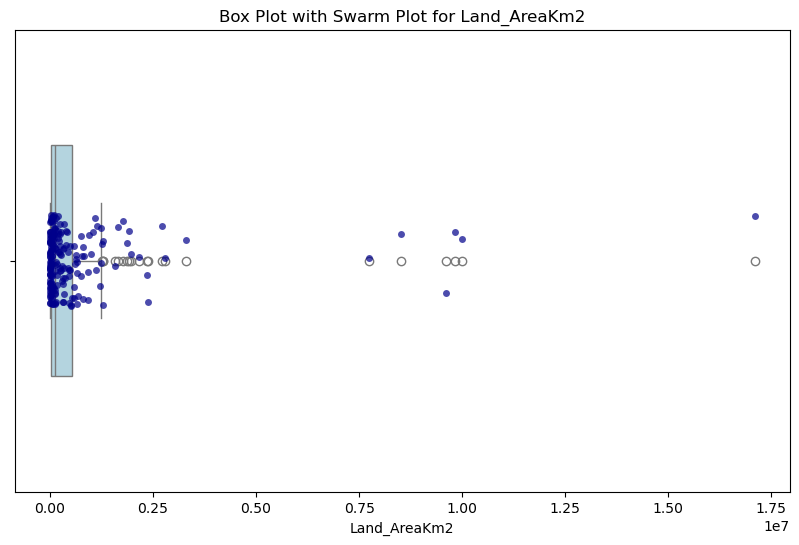

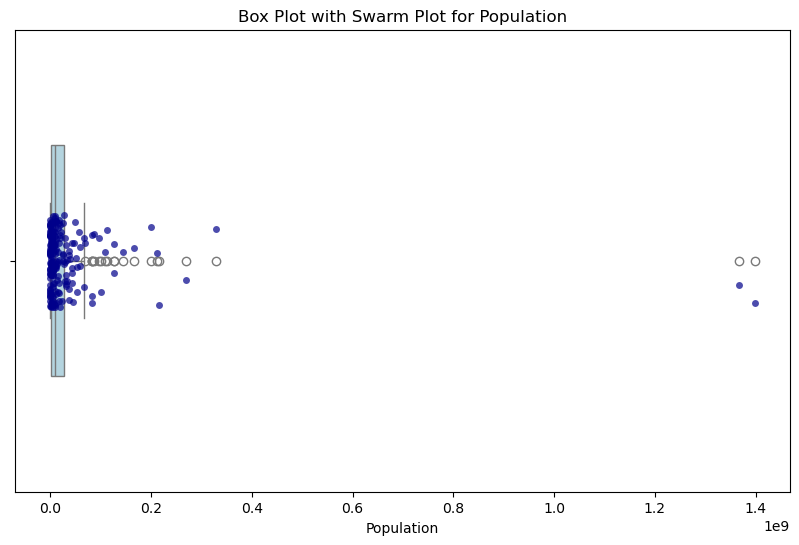

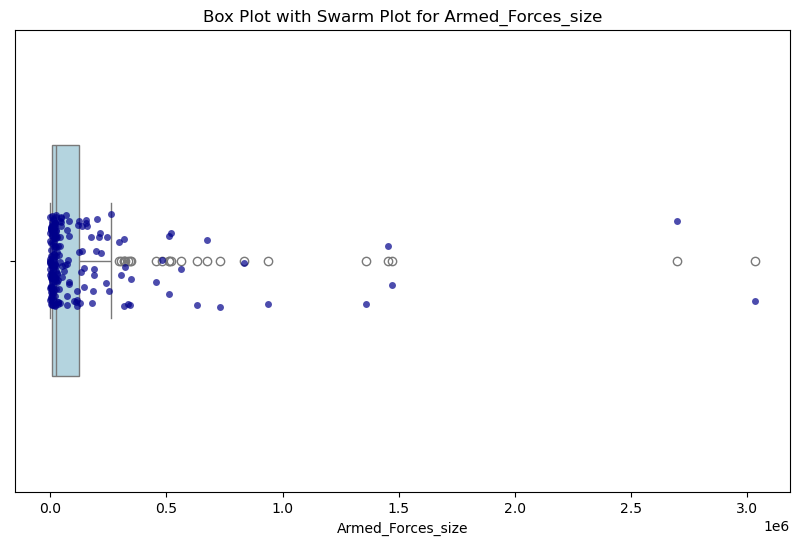

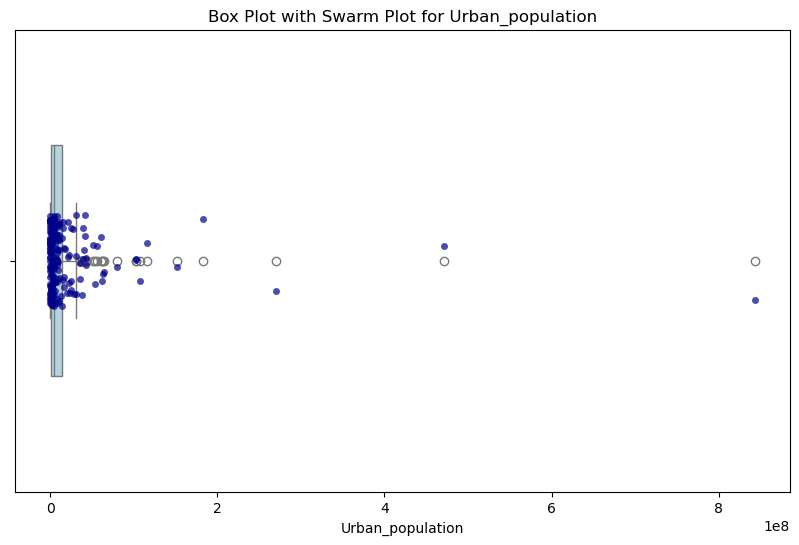

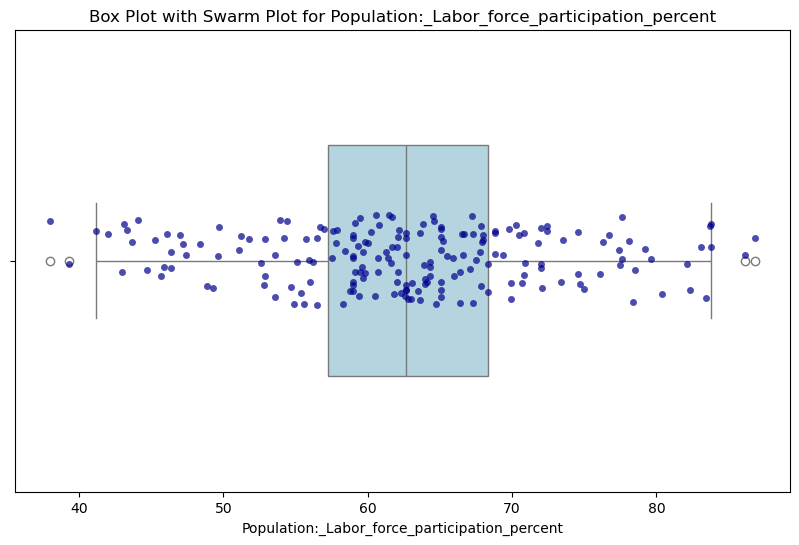

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directories for each theme group to save the plots
theme_groups = {
    'Economic': ['GDP', 'Minimum_wage', 'Tax_revenue_percent', 'Total_tax_rate', 
                 'CPI', 'CPI_Change_percent', 'Gasoline_Price', 'Unemployment_rate'],
    'Healthcare': ['Life_expectancy', 'Fertility_Rate', 'Infant_mortality',
                   'Out_of_pocket_health_expenditure', 'Birth_Rate', 'Physicians_per_thousand'],
    'Education': ['Gross_primary_education_enrollment_percent', 'Gross_tertiary_education_enrollment_percent'], 
    'Environmental': ['Co2_Emissions', 'Forested_Area_percent', 'Agricultural_Land_percent', 'Land_AreaKm2'], 
    'Demographics': ['Population', 'Armed_Forces_size', 'Urban_population', 'Population:_Labor_force_participation_percent']
}

output_dir = 'C:/Users/mrosk/OneDrive/Desktop/eda-visualization-country/reports/figures/boxplots'
os.makedirs(output_dir, exist_ok=True)

for theme, indicators in theme_groups.items():
    theme_dir = os.path.join(output_dir, theme)
    os.makedirs(theme_dir, exist_ok=True)

    for column in indicators:
        if column in df.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[column], color='lightblue', width=0.5)
            sns.stripplot(x=df[column], color='darkblue', alpha=0.7)

            plt.title(f'Box Plot with Swarm Plot for {column}')
            plt.xlabel(column)

            # Save the plot as an image
            plt.savefig(os.path.join(theme_dir, f'{column}_boxplot.png'))
            plt.show()  # Close the plot to free up memory


In [16]:
import folium
import branca.colormap as cm
import plotly.express as px
from ipywidgets import widgets, Button, HBox, VBox, Output
from IPython.display import display, clear_output
import numpy as np

# Define the indicators for each category
indicators = {
    'Economic': ['GDP', 'Minimum_wage', 'Tax_revenue_percent', 'Total_tax_rate', 
                 'CPI', 'CPI_Change_percent', 'Gasoline_Price', 'Unemployment_rate'],
    'Healthcare': ['Life_expectancy', 'Fertility_Rate', 'Infant_mortality',
                   'Out_of_pocket_health_expenditure', 'Birth_Rate', 'Physicians_per_thousand'],
    'Education': ['Gross_primary_education_enrollment_percent', 'Gross_tertiary_education_enrollment_percent'], 
    'Environmental': ['Co2_Emissions', 'Forested_Area_percent', 'Agricultural_Land_percent', 'Land_AreaKm2'], 
    'Demographics': ['Population', 'Armed_Forces_size', 'Urban_population', 'Population:_Labor_force_participation_percent']
}

# Define color themes for each category
theme_colors = {
    'Economic': 'Plotly',
    'Healthcare': 'Alphabet',
    'Education': 'Dark2',
    'Environmental': 'Prism',
    'Demographics': 'Vivid'
}

# Flatten the dictionary to create a combined list of indicators for the dropdown
all_indicators = [(f"{theme}: {ind}", (theme, ind)) for theme, inds in indicators.items() for ind in inds]

# Define a custom color ramp with more distinct steps
def select_color_ramp(indicator):
    # Calculate the percentiles
    p10, q1, q2, q3, p90 = np.percentile(df[indicator].dropna(), [10, 25, 50, 75, 90])
    
    # Indicators where higher is better (e.g., GDP, Life expectancy)
    good_green_bad_red = [
        'GDP', 'Minimum_wage', 'Life_expectancy', 'Gross_primary_education_enrollment_percent',
        'Gross_tertiary_education_enrollment_percent', 'Forested_Area_percent', 'Population:_Labor_force_participation_percent'
    ]
    
    # Indicators where lower is better (e.g., Unemployment_rate, Infant_mortality)
    good_red_bad_green = [
        'Unemployment_rate', 'Infant_mortality', 'Co2_Emissions', 'CPI', 'CPI_Change_percent'
    ]
    
    if indicator in good_green_bad_red:
        return cm.LinearColormap(
            ['red', 'orange', 'yellow', 'lightgreen', 'green'],
            vmin=df[indicator].min(), vmax=df[indicator].max()
        )
    elif indicator in good_red_bad_green:
        return cm.LinearColormap(
            ['green', 'lightgreen', 'yellow', 'orange', 'red'],
            vmin=df[indicator].min(), vmax=df[indicator].max()
        )
    else:
        return cm.LinearColormap(
            ['yellow', 'orange', 'red'],
            vmin=df[indicator].min(), vmax=df[indicator].max()
        )

def update_map(indicator, category):
    if indicator not in df.columns:
        print(f"Indicator '{indicator}' not found in the data.")
        return

    with map_output:
        clear_output(wait=True)
        
        m = folium.Map(location=[10, 20], zoom_start=3, tiles="cartodb positron")

        colormap = select_color_ramp(indicator)
        
        folium.GeoJson(
            r'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\data\modified_boundaries.geojson',
            style_function=lambda feature: {
                'fillColor': colormap(df.set_index('Country').loc[feature['properties']['name'], indicator]) 
                if feature['properties']['name'] in df['Country'].values else 'lightgray',
                'color': 'black',
                'weight': 0.5,
                'dashArray': '5, 5'
            },
            tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], labels=True, 
                                          style=("font-weight: bold; background-color: white; padding: 5px;"))
        ).add_to(m)
        
        colormap.add_to(m)

        folium.LayerControl().add_to(m)
        
        # Save the map as an interactive HTML file
        m.save(fr'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\{category}_{indicator}.html')
        
        # Display the map in the notebook
        display(m)

    # Generate and display the bar chart for top 20 countries
    top_20_df = df[['Country', indicator]].sort_values(by=indicator, ascending=False).head(20)
    color_discrete_map = px.colors.qualitative.__dict__[theme_colors[category.capitalize()]]
    fig = px.bar(top_20_df, x='Country', y=indicator, title=f'Top 20 Countries by {indicator}', 
                 labels={indicator: f'{indicator} Value'}, color_discrete_sequence=color_discrete_map)
    
    # Save the bar chart as an image
    bar_chart_image_path = fr'C:\Users\mrosk\OneDrive\Desktop\eda-visualization-country\reports\figures\{category}_{indicator}_bar_chart.png'
    fig.write_image(bar_chart_image_path)
    
    # Display the bar chart in the notebook
    fig.show()

def on_button_click(b):
    selected_theme, selected_indicator = indicator_dropdown.value
    update_map(selected_indicator, selected_theme.lower())

# Create the dropdown and button
indicator_dropdown = widgets.Dropdown(options=all_indicators, description='Indicator:')
update_button = Button(description="Update Map")

map_output = Output()

# Set the button's on-click event
update_button.on_click(on_button_click)

# Display the UI elements
ui = VBox([HBox([indicator_dropdown, update_button]), map_output])
display(ui)
